# Clustering using K-Means


In [26]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore', category=FutureWarning)

# Read the data
points_df = pd.read_csv("datasets/points.csv")
print(points_df.shape)
points_df.head(10)


(200, 2)


,X,Y
0,44,47
1,64,67
2,67,9
3,83,21
4,36,87
5,70,88
6,88,12
7,58,65
8,39,87
9,46,88


### Plot the data before clustering

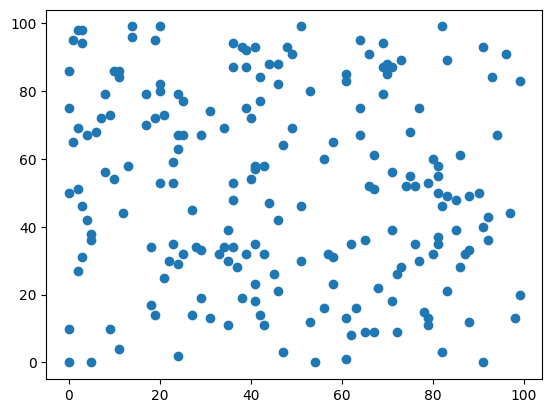

In [30]:
xs = points_df['X']
ys = points_df['Y']

plt.scatter(xs, ys)
plt.show()

### Build model

In [42]:
model = KMeans(n_clusters=4)
model.fit(points_df)
labels = model.predict(points_df)
print(labels)


[2 3 0 0 1 3 0 3 1 3 0 1 0 1 3 3 3 0 2 2 2 0 0 1 2 3 2 2 2 2 1 2 0 1 1 2 3
 0 1 0 1 3 1 2 0 0 1 0 0 0 3 2 3 3 1 2 3 1 1 1 2 1 1 1 0 3 0 0 0 2 1 0 1 2
 1 0 0 2 2 3 0 2 1 0 1 1 0 3 3 1 1 1 3 0 2 2 3 3 2 3 2 3 1 2 2 0 1 1 1 1 0
 0 3 3 2 1 1 2 2 3 1 2 1 1 2 1 2 2 0 2 2 2 0 3 0 2 0 2 1 1 3 0 0 0 0 2 1 2
 2 2 3 1 2 3 0 1 2 1 0 0 0 1 2 3 3 0 3 1 0 1 1 0 1 3 0 1 3 1 3 3 0 2 2 0 1
 0 3 1 0 2 1 0 2 1 2 0 3 3 2 2]


### Plot the data after clustering

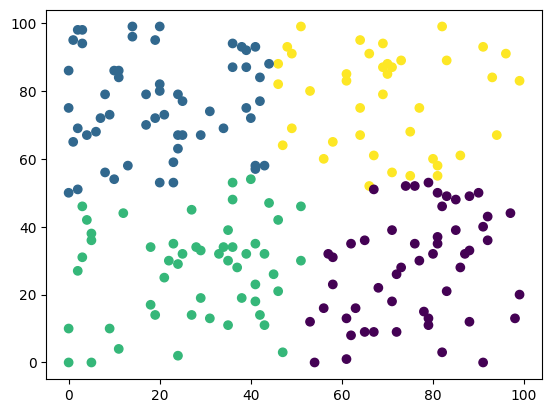

In [43]:
plt.scatter(xs, ys, c=labels)
plt.show()